## EDA for Waste Classification Data

In [3]:
train_path = '../../Data_Models/DATASET/TRAIN'
test_path = '../../Data_Models/DATASET/TEST'


In [4]:
from glob import glob
import tensorflow as tf
import numpy as np
import pandas as pd
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in glob(category+'/*'):
        img = tf.keras.preprocessing.image.load_img(file)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data_waste_seg=pd.DataFrame({'image': x_data,'label': y_data})
data_waste_seg.head()

image label
0  [[[123.0, 120.0, 103.0], [122.0, 119.0, 102.0]...     R
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R
2  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R
3  [[[169.0, 174.0, 204.0], [154.0, 161.0, 190.0]...     R
4  [[[254.0, 254.0, 246.0], [254.0, 254.0, 246.0]...     R

In [5]:
data_waste_seg['label'].value_counts()

O    12565
R     9999
Name: label, dtype: int64

In [16]:
x, y, c, max_pix, min_pix =  [], [], [], [], []
for image in data_waste_seg['image']:
    shape = image.shape
    x.append(shape[0])
    y.append(shape[1])
    c.append(shape[2])
    max_pix.append(np.max(image))
    min_pix.append(np.min(image))
data_waste_seg['height'], data_waste_seg['width'], data_waste_seg['color_channels'], data_waste_seg['max_pixel'], data_waste_seg['min_pixel'] = x, y, c, max_pix, min_pix
data_waste_seg.head()

image label  width  height  \
0  [[[123.0, 120.0, 103.0], [122.0, 119.0, 102.0]...     R    300     168   
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R    231     218   
2  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R    225     225   
3  [[[169.0, 174.0, 204.0], [154.0, 161.0, 190.0]...     R    380     133   
4  [[[254.0, 254.0, 246.0], [254.0, 254.0, 246.0]...     R    284     177   

   color_channels  max_pixel  min_pixel  
0               3      255.0       19.0  
1               3      255.0        0.0  
2               3      255.0        0.0  
3               3      255.0        0.0  
4               3      255.0        0.0

Text(0.5, 1.0, 'Class Distribution')

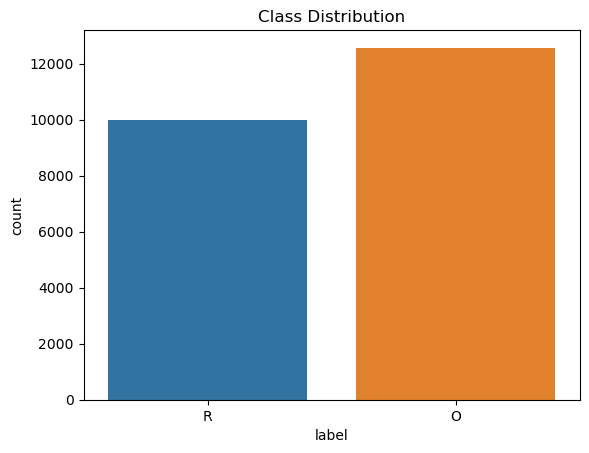

In [17]:
import seaborn as sns

sns.countplot(data=data_waste_seg, x='label').set_title('Class Distribution')

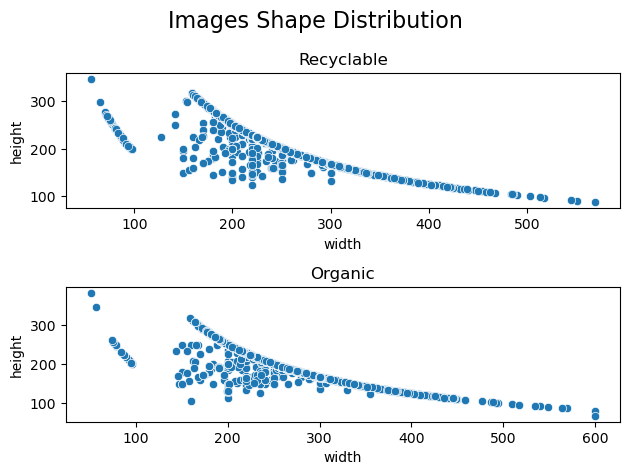

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
fig.suptitle('Images Shape Distribution', fontsize=16)
sns.scatterplot(data=data_waste_seg[data_waste_seg['label'] == 'R'], x='width', y='height', ax=ax[0])
sns.scatterplot(data=data_waste_seg[data_waste_seg['label'] == 'O'], x='width', y='height', ax=ax[1])
ax[0].set_title('Recyclable')
ax[1].set_title('Organic')
fig.tight_layout()

/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_7063/927268982.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_width = data_waste_seg.mean()['width']
/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_7063/927268982.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_height = data_waste_seg.mean()['height']


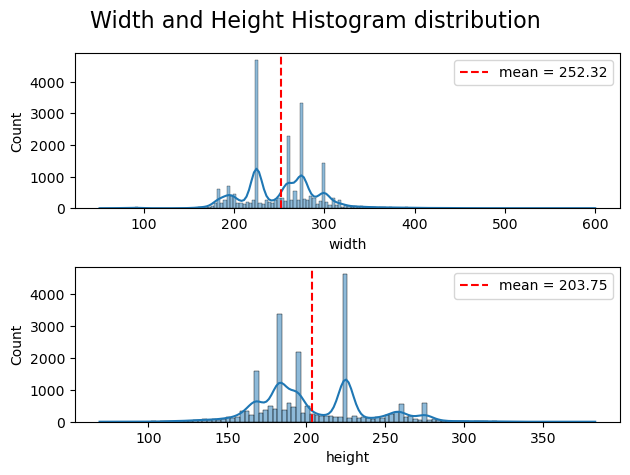

In [19]:
fig, ax = plt.subplots(2)
fig.suptitle('Width and Height Histogram distribution', fontsize=16)
sns.histplot(data=data_waste_seg, x='width', ax=ax[0], kde=True)
sns.histplot(data=data_waste_seg, x='height', ax=ax[1], kde=True)
mean_width = data_waste_seg.mean()['width']
mean_height = data_waste_seg.mean()['height']
ax[0].axvline(mean_width, c = 'r', ls='--', label=f'mean = {mean_width:.2f}')
ax[1].axvline(mean_height, c = 'r', ls='--', label=f'mean = {mean_height:.2f}')
# ax[0].set_title('Width')
# ax[1].set_title('Height')
ax[0].legend()
ax[1].legend()
fig.tight_layout()

We can determine the target size to which we want to modify all the images, so that there is less distortion while resizing. for example target size can be (200, 250) or (225, 225)

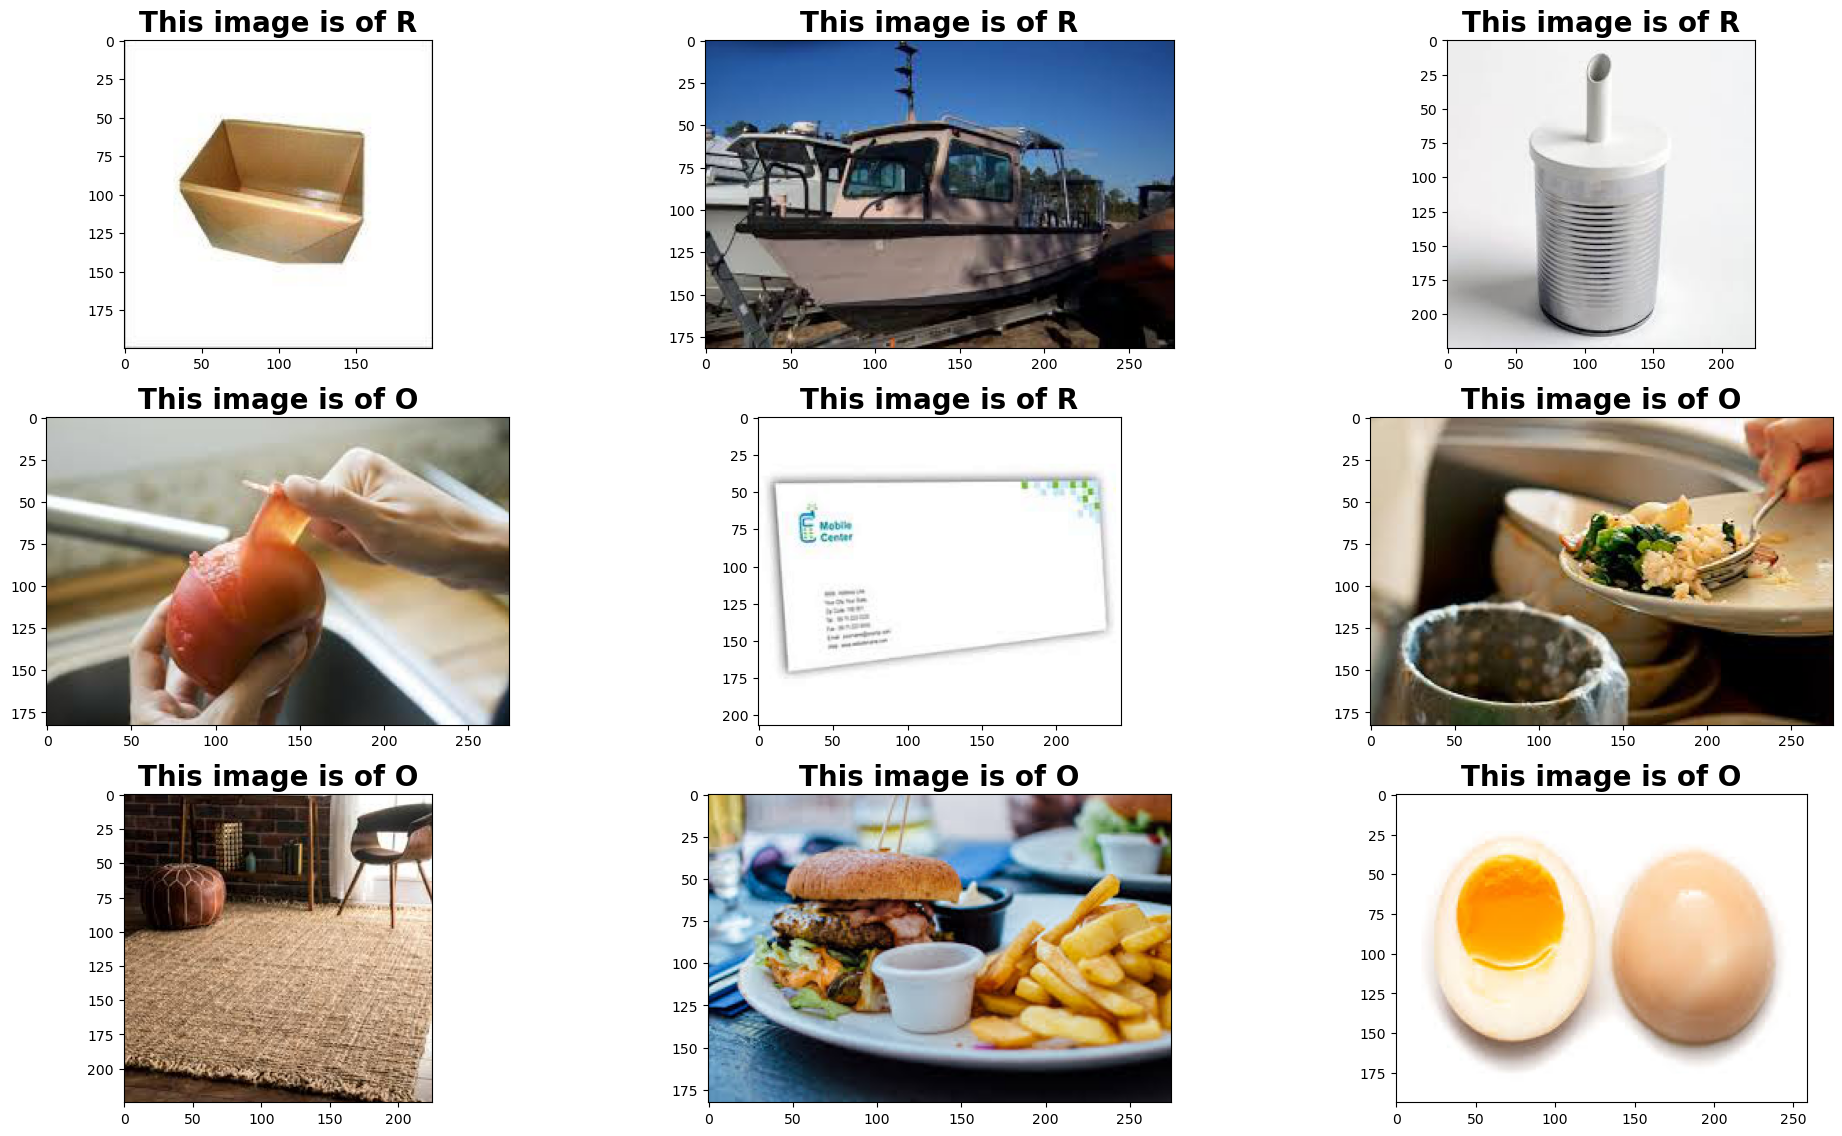

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(22000)
    plt.title('This image is of {0}'.format(data_waste_seg.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(tf.keras.preprocessing.image.array_to_img(data_waste_seg.image[index]))
    plt.tight_layout()

## EDA for Trashnet 

In [19]:
from glob import glob
import tensorflow as tf
import numpy as np
import pandas as pd
x_data = [] 
y_data = [] 
train_path = '../../Data_Models/Trash Net'
for category in glob(train_path+'/*'):
    for file in glob(category+'/*'):
        img = tf.keras.preprocessing.image.load_img(file)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data_trashnet=pd.DataFrame({'image': x_data,'label': y_data})
data_trashnet.head()

image  label
0  [[[236.0, 232.0, 220.0], [236.0, 232.0, 220.0]...  paper
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper
2  [[[240.0, 240.0, 238.0], [240.0, 240.0, 238.0]...  paper
3  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper
4  [[[240.0, 244.0, 245.0], [240.0, 244.0, 245.0]...  paper

In [20]:
x, y, c, max_pix, min_pix =  [], [], [], [], []
for image in data_trashnet['image']:
    shape = image.shape
    x.append(shape[0])
    y.append(shape[1])
    c.append(shape[2])
    max_pix.append(np.max(image))
    min_pix.append(np.min(image))
data_trashnet['height'], data_trashnet['width'], data_trashnet['color_channels'], data_trashnet['max_pixel'], data_trashnet['min_pixel'] = x, y, c, max_pix, min_pix
data_trashnet.head()

image  label  height  width  \
0  [[[236.0, 232.0, 220.0], [236.0, 232.0, 220.0]...  paper     384    512   
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper     384    512   
2  [[[240.0, 240.0, 238.0], [240.0, 240.0, 238.0]...  paper     384    512   
3  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper     384    512   
4  [[[240.0, 244.0, 245.0], [240.0, 244.0, 245.0]...  paper     384    512   

   color_channels  max_pixel  min_pixel  
0               3      255.0        0.0  
1               3      255.0        0.0  
2               3      255.0        0.0  
3               3      255.0       24.0  
4               3      255.0        0.0

In [21]:
data_trashnet['color_channels'].value_counts()

3    2527
Name: color_channels, dtype: int64

Text(0.5, 1.0, ' Trashnet Class Distribution')

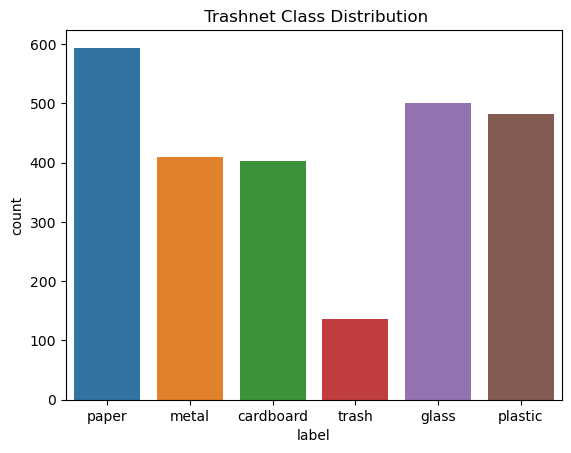

In [22]:
sns.countplot(data=data_trashnet, x='label').set_title(' Trashnet Class Distribution')


/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_10208/1479335058.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_width = data_trashnet.mean()['width']
/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_10208/1479335058.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_height = data_trashnet.mean()['height']


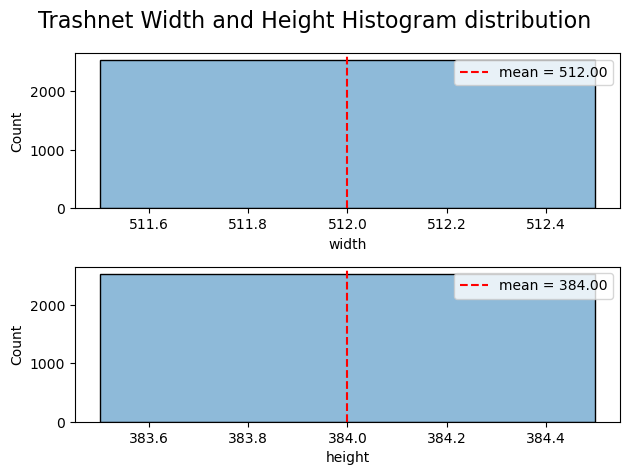

In [26]:
fig, ax = plt.subplots(2)
fig.suptitle('Trashnet Width and Height Histogram distribution', fontsize=16)
sns.histplot(data=data_trashnet, x='width', ax=ax[0], kde=True)
sns.histplot(data=data_trashnet, x='height', ax=ax[1], kde=True)
mean_width = data_trashnet.mean()['width']
mean_height = data_trashnet.mean()['height']
ax[0].axvline(mean_width, c = 'r', ls='--', label=f'mean = {mean_width:.2f}')
ax[1].axvline(mean_height, c = 'r', ls='--', label=f'mean = {mean_height:.2f}')
# ax[0].set_title('Width')
# ax[1].set_title('Height')
ax[0].legend()
ax[1].legend()
fig.tight_layout()

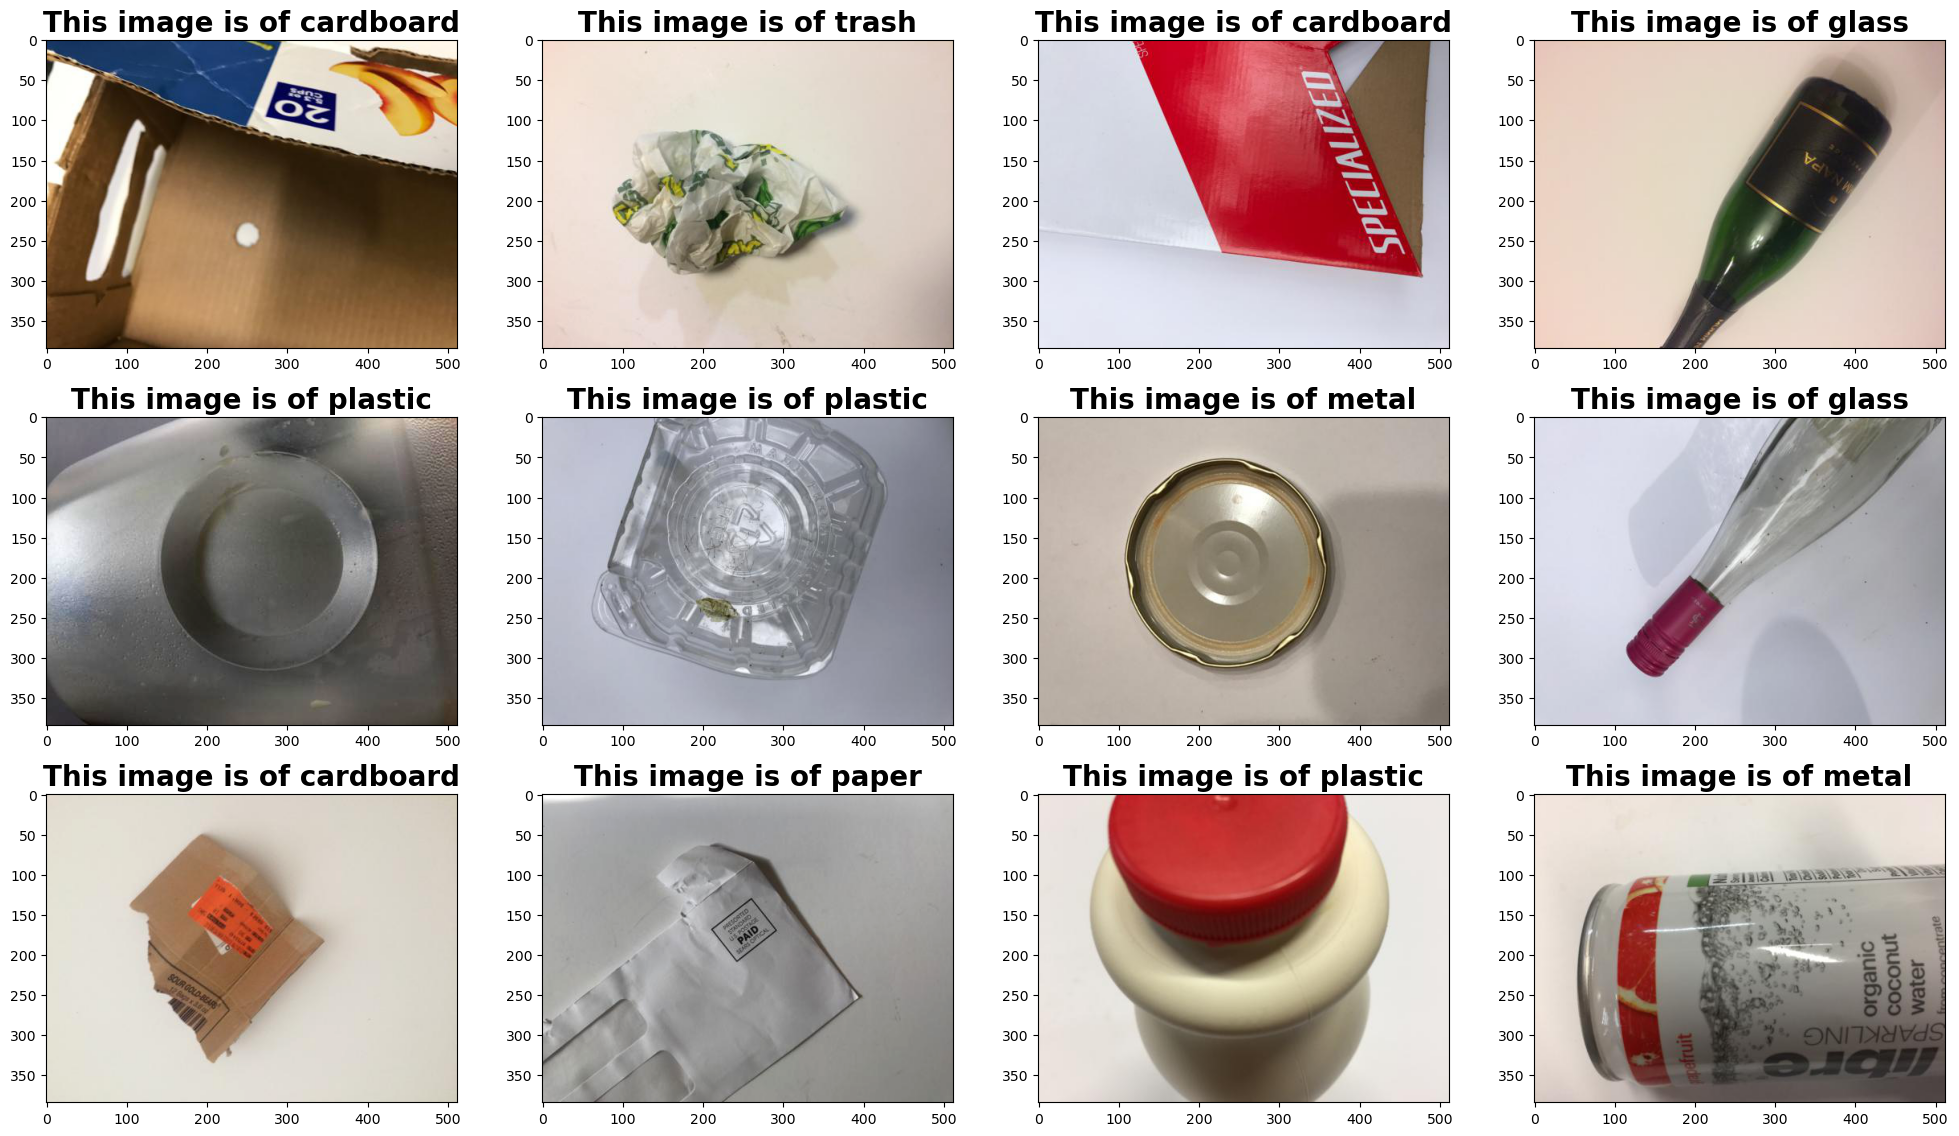

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(12):
    plt.subplot(4,4,(i%12)+1)
    index=np.random.randint(2500)
    plt.title('This image is of {0}'.format(data_trashnet.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(tf.keras.preprocessing.image.array_to_img(data_trashnet.image[index]))
    plt.tight_layout()

In [27]:
data_trashnet['label'].value_counts()

paper        594
glass        501
plastic      482
metal        410
cardboard    403
trash        137
Name: label, dtype: int64

## EDA for Trash Box


In [29]:
from glob import glob
import tensorflow as tf
import numpy as np
import pandas as pd
x_data_shape = [] 
y_data = [] 
train_path = '../../Data_Models/TrashBox_train_set/'
for category in glob(train_path+'/*'):
    for file in glob(category+'/*'):
        try :
            img = tf.keras.preprocessing.image.load_img(file)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            x_data_shape.append(img_array.shape) 
            y_data.append(category.split("/")[-1])
        except: 
            print(f'file name is {file}')
        
        
data_trashbox=pd.DataFrame({'image_shape': x_data_shape,'label': y_data})
data_trashbox.head()

/Users/murali/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


file name is ../../Data_Models/TrashBox_train_set/paper/paper 2273.jpg
file name is ../../Data_Models/TrashBox_train_set/cardboard/cardboard 1075.jpg
file name is ../../Data_Models/TrashBox_train_set/e-waste/e-waste 1719.jpg


image_shape  label
0  (340, 340, 3)  paper
1  (406, 340, 3)  paper
2  (384, 512, 3)  paper
3  (511, 340, 3)  paper
4  (300, 300, 3)  paper

Can't Store all the pixel values because the kernal was crashing so just stored the shape of the image instead of all pixel values. There are also some corrupted files which are 

file name is ../../Data_Models/TrashBox_train_set/paper/paper 2273.jpg 

file name is ../../Data_Models/TrashBox_train_set/cardboard/cardboard 1075.jpg

file name is ../../Data_Models/TrashBox_train_set/e-waste/e-waste 1719.jpg

when we use data for training we will remove them. Because we are not storing the pixel values we shall not be calculating max and min pixels also. we will just extract width, height and color_channels from image_shape

In [30]:
x, y, c =  [], [], []
for shape in data_trashbox['image_shape']:
    x.append(shape[0])
    y.append(shape[1])
    c.append(shape[2])
    
data_trashbox['height'], data_trashbox['width'], data_trashbox['color_channels']= x, y, c
data_trashbox.head()

image_shape  label  height  width  color_channels
0  (340, 340, 3)  paper     340    340               3
1  (406, 340, 3)  paper     406    340               3
2  (384, 512, 3)  paper     384    512               3
3  (511, 340, 3)  paper     511    340               3
4  (300, 300, 3)  paper     300    300               3

In [31]:
data_trashbox['color_channels'].value_counts()

3    14279
Name: color_channels, dtype: int64

Text(0.5, 1.0, ' TrashBox Class Distribution')

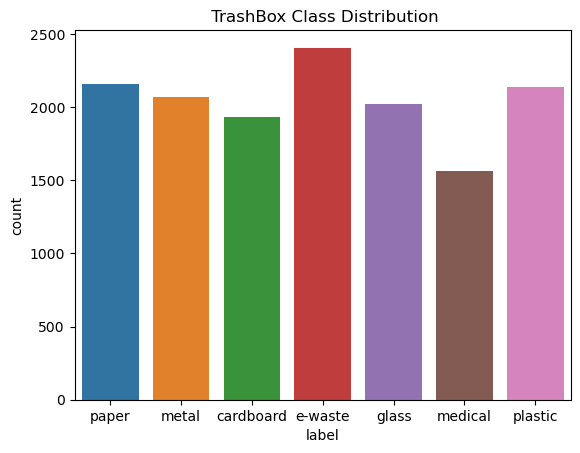

In [32]:
sns.countplot(data=data_trashbox, x='label').set_title(' TrashBox Class Distribution')

/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_10208/3902989004.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_width = data_trashbox.mean()['width']
/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_10208/3902989004.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_height = data_trashbox.mean()['height']


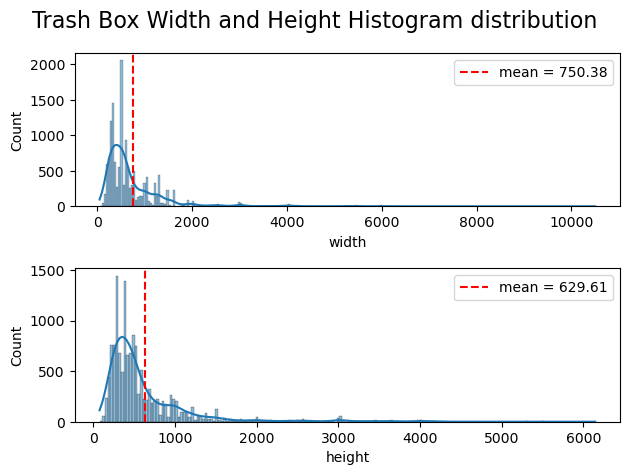

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2)
fig.suptitle('Trash Box Width and Height Histogram distribution', fontsize=16)
sns.histplot(data=data_trashbox, x='width', ax=ax[0], kde=True)
sns.histplot(data=data_trashbox, x='height', ax=ax[1], kde=True)
mean_width = data_trashbox.mean()['width']
mean_height = data_trashbox.mean()['height']
ax[0].axvline(mean_width, c = 'r', ls='--', label=f'mean = {mean_width:.2f}')
ax[1].axvline(mean_height, c = 'r', ls='--', label=f'mean = {mean_height:.2f}')
# ax[0].set_title('Width')
# ax[1].set_title('Height')
ax[0].legend()
ax[1].legend()
fig.tight_layout()

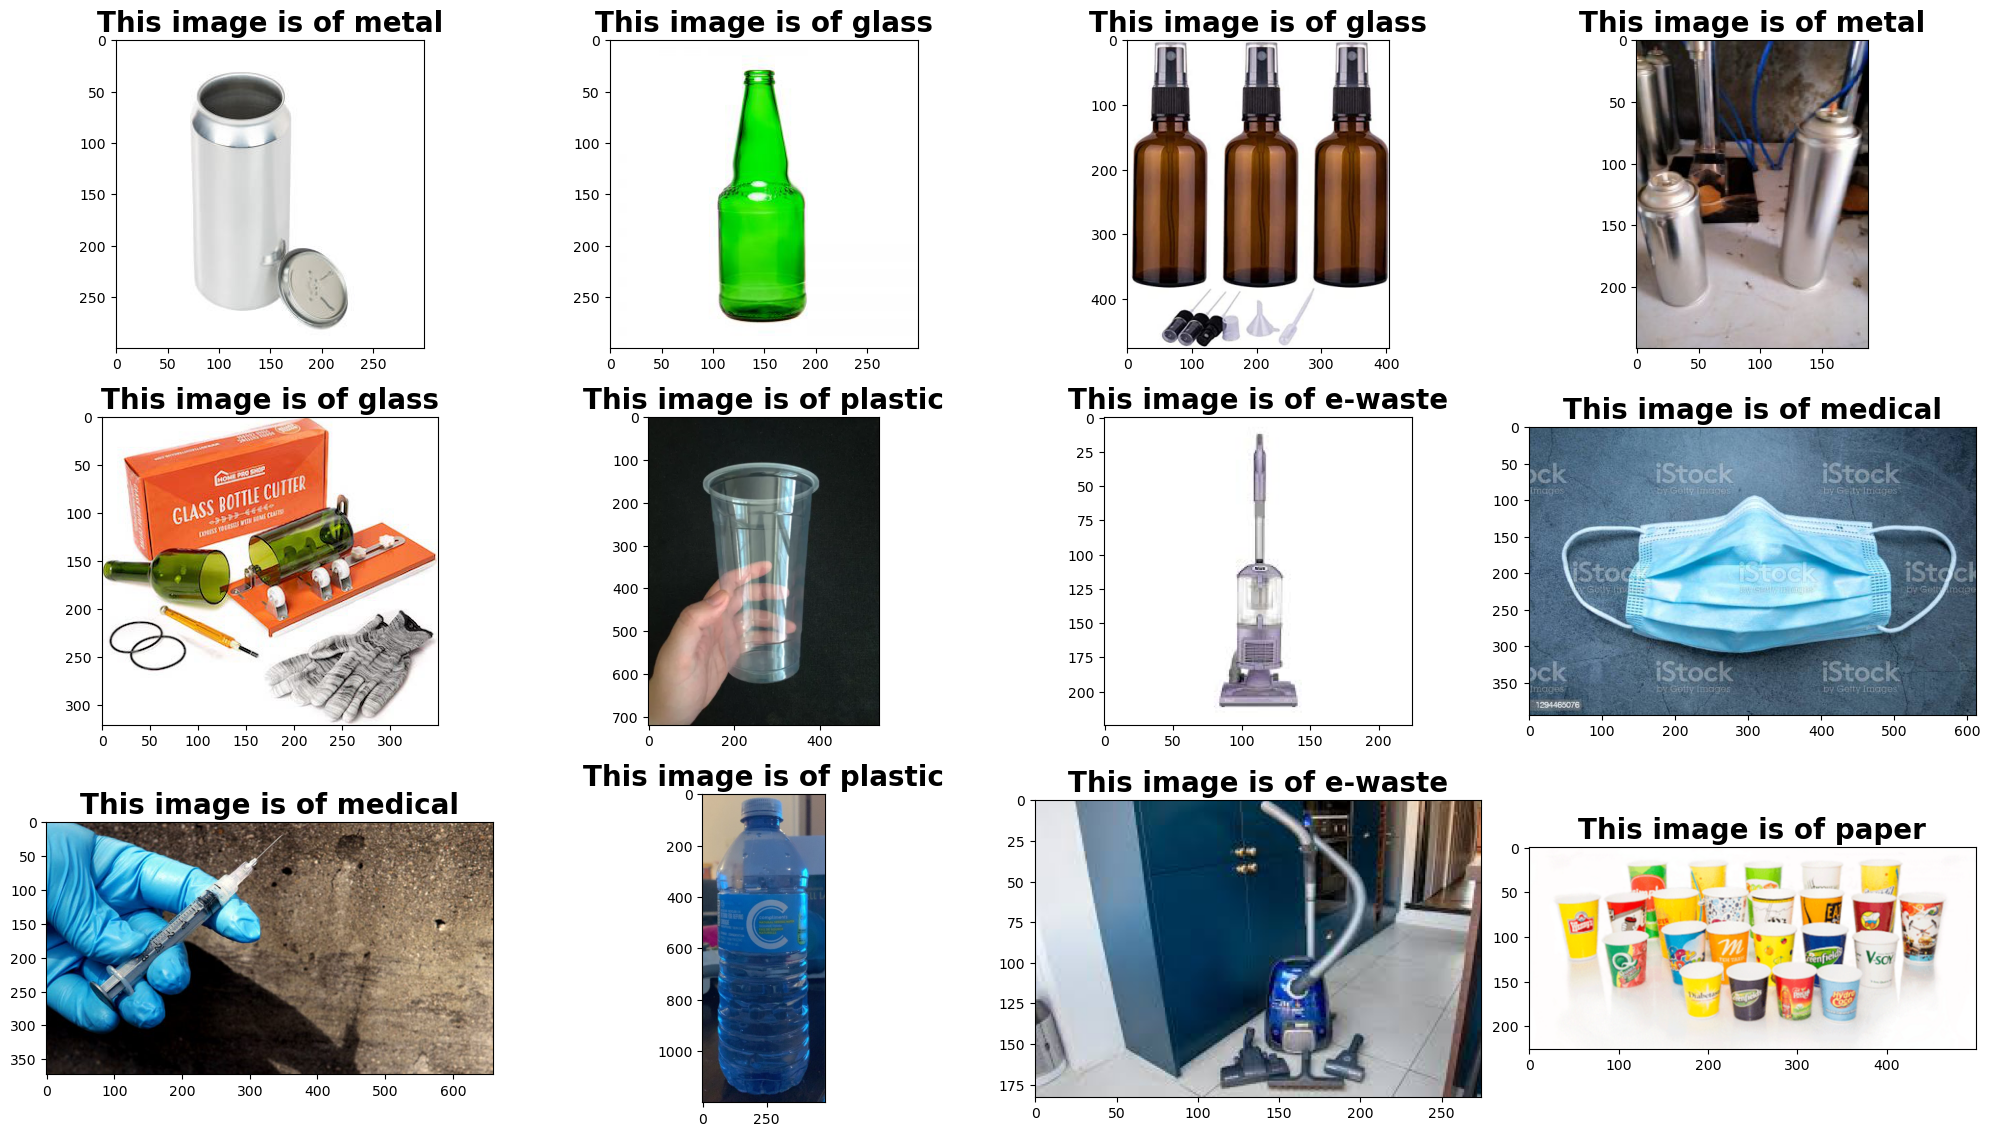

In [50]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
plt.figure(figsize=(20,15))

all_images = glob.glob('../../Data_Models/TrashBox_train_set/**/*', recursive=True)
for i in range(12):
    plt.subplot(4,4,(i%12)+1)
    index=np.random.randint(7, 15000)
    plt.title('This image is of {0}'.format(all_images[index].split('/')[-1].split(' ')[0]),fontdict={'size':20,'weight':'bold'})
    img = tf.keras.preprocessing.image.load_img(all_images[index])
    plt.imshow(img)
    plt.tight_layout()
# all_images[3].split('/')[-1]

In [34]:
data_trashbox['label'].value_counts()

e-waste      2405
paper        2155
plastic      2135
metal        2068
glass        2022
cardboard    1929
medical      1565
Name: label, dtype: int64

## Model For classifying Organic vs Recylable

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_path = '../../Data_Models/DATASET/TRAIN'
test_path = '../../Data_Models/DATASET/TEST'
target_size = (225, 225)

train_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)
train_data_generator = train_gen.flow_from_directory(train_path, target_size=target_size, class_mode='binary', batch_size=32)
test_data_generator = train_gen.flow_from_directory(test_path, target_size= target_size, class_mode='binary', batch_size=32)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [3]:
# class_names = train_data_generator.class_names
class_names = ['Organic', 'Recylable']

float32 (32, 225, 225, 3)
float32 (32,)


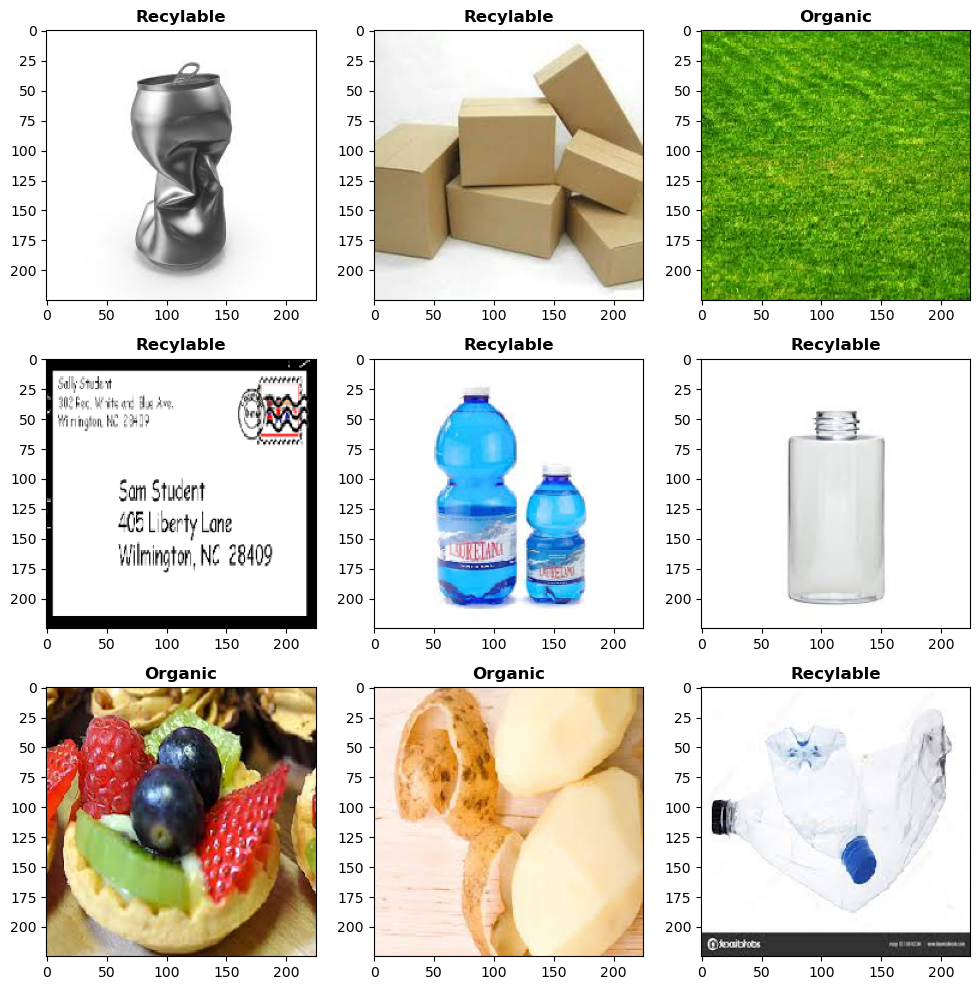

In [4]:
images, labels = next(train_data_generator)

print(images.dtype, images.shape)
print(labels.dtype, labels.shape)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])], fontdict={'weight':'bold'})
    # plt.axis("off")
    plt.tight_layout()

### Model with own layers - just for testing

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(225, 225, 3)),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(264, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 223, 512)     14336     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 512)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 264)     1216776   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 264)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       304256    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_data_generator, epochs=5, validation_data=test_data_generator)

Epoch 1/5


2022-10-06 20:05:16.417988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x28368e6f0>
    label = <none> 
    device = <AGXG13GDevice: 0x117f12c00>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x117334200>
        label = <none> 
        device = <AGXG13GDevice: 0x117f12c00>
            name = Apple M1 
    retainedReferences = 1


  1/706 [..............................] - ETA: 6:20:14 - loss: 0.6894 - accuracy: 0.5625

### Loading the Pretrained model

### ResNet50

In [5]:
trained_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(225,225,3)
)
trained_model.trainable= False

2022-10-06 20:08:10.730232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-06 20:08:10.730600: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [6]:
model_pre_trained = tf.keras.models.Sequential([trained_model,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model_pre_trained.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_pre_trained.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 40,342,273
Trainable params: 16,777,473
Non-trainable params: 23,564,800
_________________________________________________________________


In [7]:

hist = model_pre_trained.fit(train_data_generator, epochs=5, validation_data=test_data_generator)

Epoch 1/5


2022-10-06 20:08:30.046296: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-06 20:08:31.490378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


706/706 [==============================] - ETA: 0s - loss: 0.3500 - accuracy: 0.9188

2022-10-06 20:16:58.414840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


706/706 [==============================] - 559s 788ms/step - loss: 0.3500 - accuracy: 0.9188 - val_loss: 0.2414 - val_accuracy: 0.9073
Epoch 2/5
706/706 [==============================] - 576s 815ms/step - loss: 0.1164 - accuracy: 0.9590 - val_loss: 0.2542 - val_accuracy: 0.9196
Epoch 3/5
706/706 [==============================] - 569s 805ms/step - loss: 0.0734 - accuracy: 0.9736 - val_loss: 0.2887 - val_accuracy: 0.9252
Epoch 4/5
706/706 [==============================] - 532s 753ms/step - loss: 0.0469 - accuracy: 0.9828 - val_loss: 0.4521 - val_accuracy: 0.9069
Epoch 5/5
706/706 [==============================] - 552s 782ms/step - loss: 0.0419 - accuracy: 0.9847 - val_loss: 0.3416 - val_accuracy: 0.9057


Text(0.5, 1.0, 'Loss Curve')

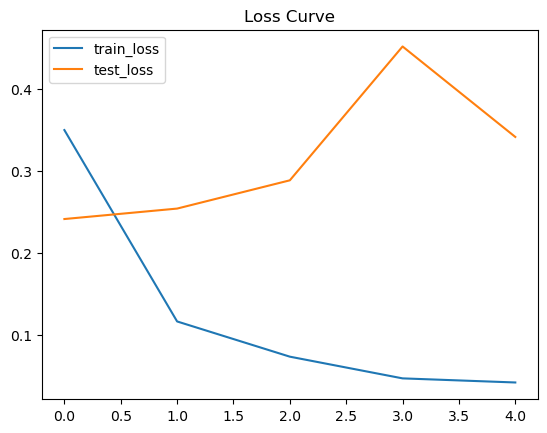

In [14]:
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='test_loss')
plt.legend()
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

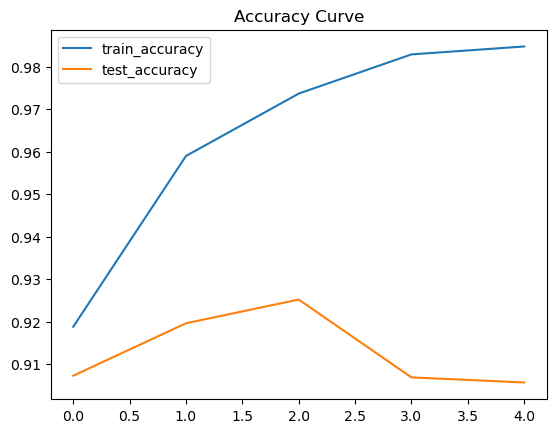

In [15]:
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.title('Accuracy Curve')

In [16]:
model_pre_trained.save('/Users/murali/Desktop/lambton sem 3/AML 3406/Data_Models/Saved_models/resnet50_90')

INFO:tensorflow:Assets written to: /Users/murali/Desktop/lambton sem 3/AML 3406/Data_Models/Saved_models/resnet50_90/assets


INFO:tensorflow:Assets written to: /Users/murali/Desktop/lambton sem 3/AML 3406/Data_Models/Saved_models/resnet50_90/assets


### EffiecientNet

In [16]:
trained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(225,225,3)
)
trained_model.trainable = False

In [17]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('efficient_history.csv', separator=',', append=True)
model_pre_trained = tf.keras.models.Sequential([trained_model,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model_pre_trained.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_pre_trained.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 81920)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               10485888  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,535,588
Trainable params: 10,486,017
Non-trainable params: 4,049,571
_________________________________________________________________


In [18]:
hist = model_pre_trained.fit(train_data_generator, epochs=5, validation_data=test_data_generator, callbacks=[csv_logger])

Epoch 1/5


2022-10-14 22:08:48.652734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


706/706 [==============================] - ETA: 0s - loss: 0.8918 - accuracy: 0.5509

2022-10-14 22:14:37.039229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


706/706 [==============================] - 390s 545ms/step - loss: 0.8918 - accuracy: 0.5509 - val_loss: 0.6882 - val_accuracy: 0.5575
Epoch 2/5
706/706 [==============================] - 494s 700ms/step - loss: 0.6876 - accuracy: 0.5569 - val_loss: 0.6867 - val_accuracy: 0.5575
Epoch 3/5
706/706 [==============================] - 378s 535ms/step - loss: 0.6867 - accuracy: 0.5569 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 4/5
706/706 [==============================] - 381s 539ms/step - loss: 0.6867 - accuracy: 0.5569 - val_loss: 0.6865 - val_accuracy: 0.5575
Epoch 5/5
706/706 [==============================] - 379s 537ms/step - loss: 0.6867 - accuracy: 0.5569 - val_loss: 0.6865 - val_accuracy: 0.5575


Text(0.5, 1.0, 'Loss Curve')

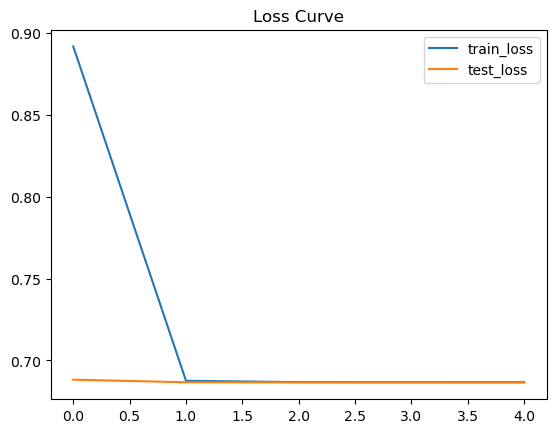

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='test_loss')
plt.legend()
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

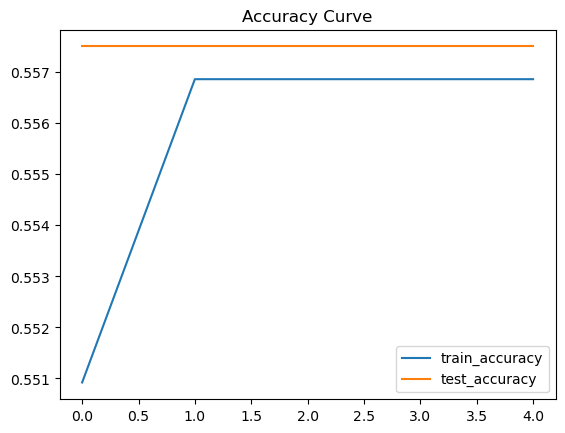

In [20]:
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.title('Accuracy Curve')

### Vgg16

In [24]:
trained_model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(225,225,3)
)
trained_model.trainable = False
    

In [25]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('vgg16_history.csv', separator=',', append=True)
model_pre_trained = tf.keras.models.Sequential([trained_model,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model_pre_trained.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_pre_trained.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
hist = model_pre_trained.fit(train_data_generator, epochs=5, validation_data=test_data_generator, callbacks=[csv_logger])

Epoch 1/5


2022-10-14 22:43:18.970943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


706/706 [==============================] - ETA: 0s - loss: 0.3147 - accuracy: 0.8729

2022-10-14 22:59:26.705655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


706/706 [==============================] - 1063s 2s/step - loss: 0.3147 - accuracy: 0.8729 - val_loss: 0.3144 - val_accuracy: 0.8798
Epoch 2/5
706/706 [==============================] - 1227s 2s/step - loss: 0.2179 - accuracy: 0.9126 - val_loss: 0.2814 - val_accuracy: 0.8985
Epoch 3/5
706/706 [==============================] - 1063s 2s/step - loss: 0.1744 - accuracy: 0.9299 - val_loss: 0.3038 - val_accuracy: 0.8814
Epoch 4/5
706/706 [==============================] - 1071s 2s/step - loss: 0.1461 - accuracy: 0.9410 - val_loss: 0.3315 - val_accuracy: 0.8890
Epoch 5/5
706/706 [==============================] - 1075s 2s/step - loss: 0.1179 - accuracy: 0.9513 - val_loss: 0.3423 - val_accuracy: 0.9021


Text(0.5, 1.0, 'Loss Curve')

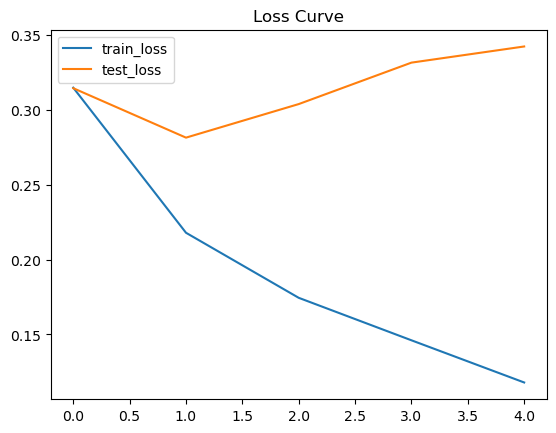

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='test_loss')
plt.legend()
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

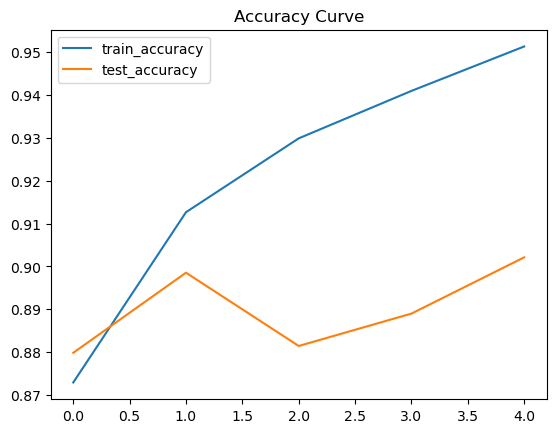

In [28]:
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.title('Accuracy Curve')

## Testing Our M1 on Transhnet and TrashBox Data.
- expectation is to predict atleast 90% as recyclable
-  after testing the result, avg. of 85% images are being classified correctly.

In [78]:
import numpy as np
import glob
images = []
# Getting all the images of trash net
image_files = glob.glob('../../Data_Models/Trash Net/**/*.jpg')
for img in image_files:
    img = tf.keras.utils.load_img(img,target_size=(225,225))
    img_arr = tf.keras.utils.img_to_array(img)
    img_arr = img_arr/255.
    # img_arr = img_arr[np.newaxis, :, :,:]
    images.append(img_arr)
images = np.array(images)


In [95]:
images.shape

(2390, 225, 225, 3)

In [79]:
# load saved model
from tensorflow import keras
model_saved = keras.models.load_model('/Users/murali/Desktop/lambton sem 3/AML 3406/Data_Models/Saved_models/resnet50_90')

In [80]:
# Predictions
p = model_saved.predict(images)

2022-10-15 01:35:44.873124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 50s 642ms/step


In [81]:
# Accuracy - How much percentage are being clasified as recyclable
p[p>0.5].shape[0]/images.shape[0]

0.8493723849372385

In [139]:
# check some wrongly classified images
import random
import matplotlib.pyplot as plt

wrong_p = p[p<0.5]
wrong_images = images[(p<0.5).flatten()]
correct_p = p[p>=0.5]
correct_images = images[(p>=0.5).flatten()]

Text(0.05, 1650, 'Recyclable >= 0.5 \n Organic < 0.5')

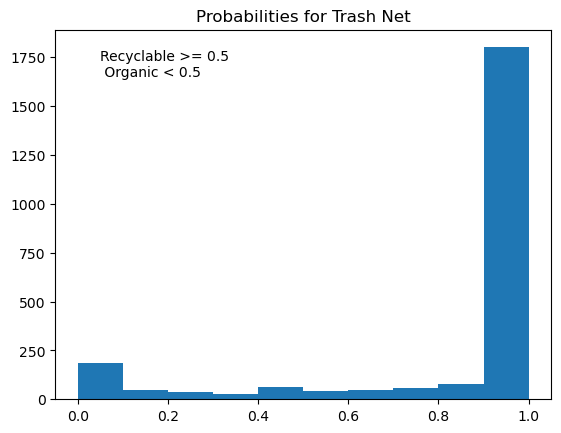

In [159]:
plt.hist(p.flatten())
plt.title('Probabilities for Trash Net')
plt.text(x =0.05,y=1650, s='Recyclable >= 0.5 \n Organic < 0.5')

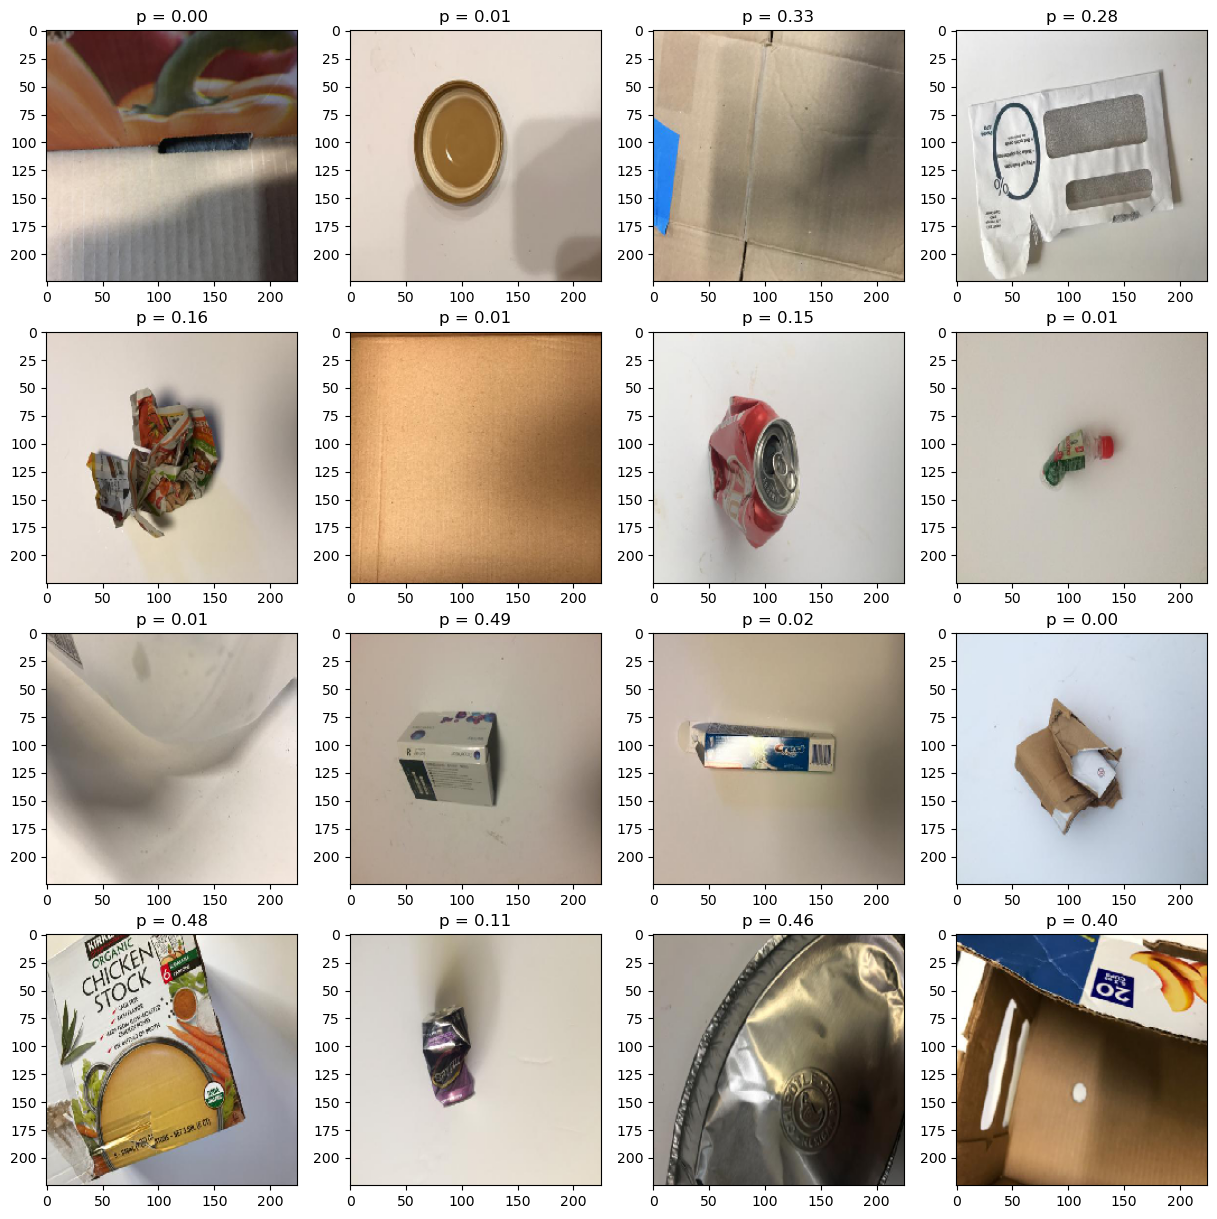

In [144]:
plt.figure(figsize=(15,15))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    r = random.randint(0,wrong_images.shape[0])
    plt.title(f'p = {wrong_p[r]:.2f}')
    plt.imshow(wrong_images[r])

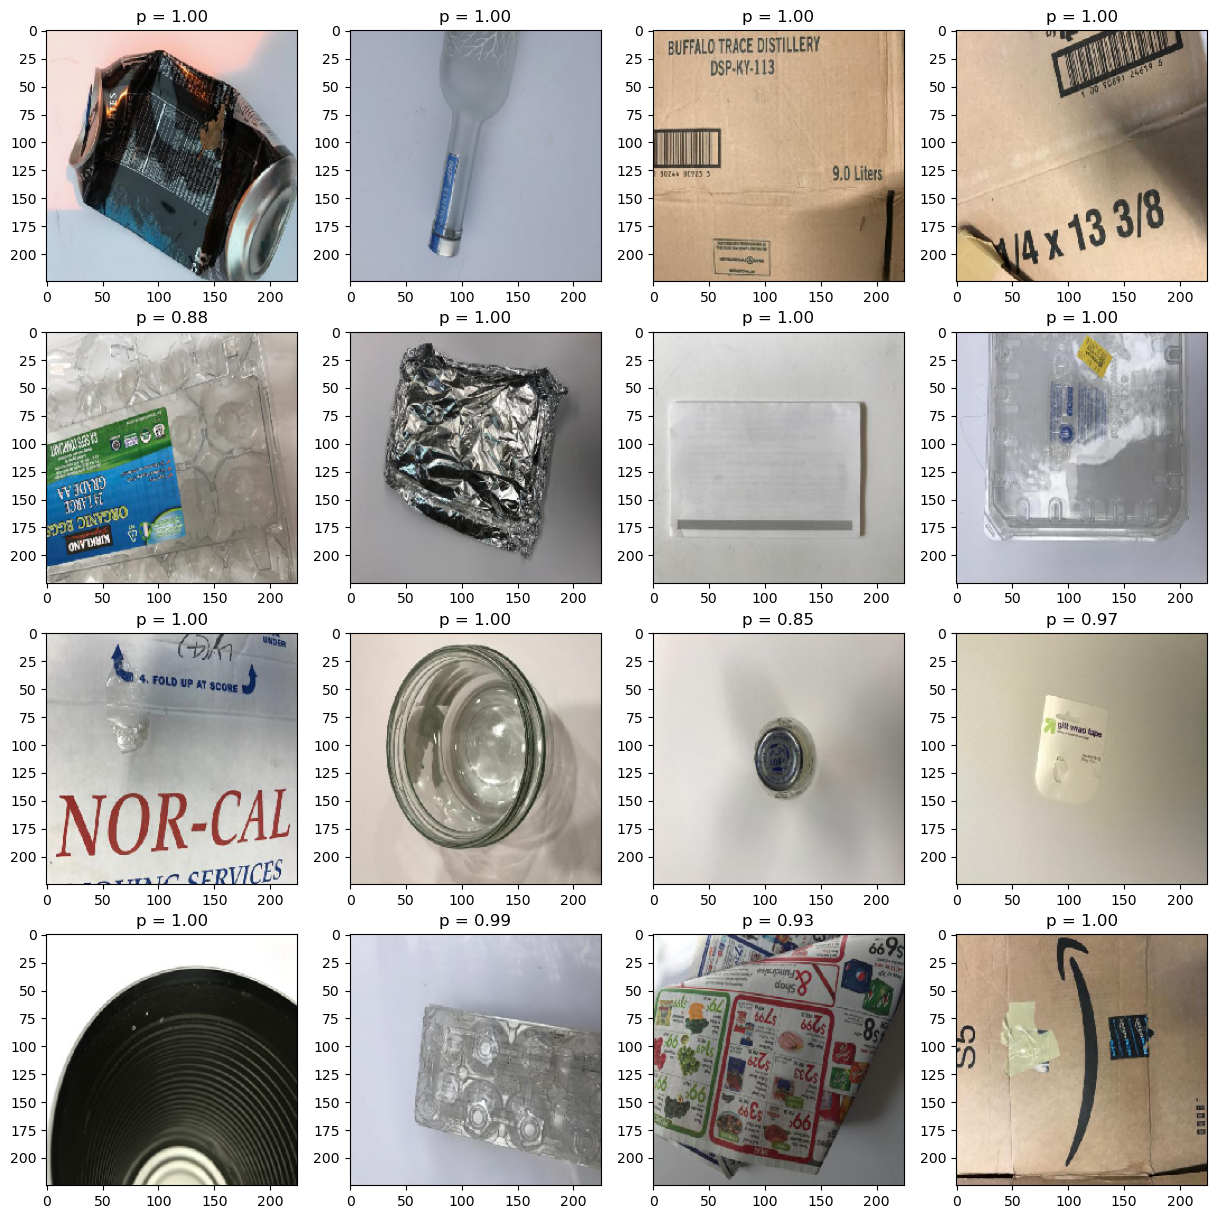

In [147]:
plt.figure(figsize=(15,15))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    r = random.randint(0,correct_images.shape[0])
    plt.imshow(correct_images[r])
    plt.title(f'p = {correct_p[r]:.2f}')


In [123]:
correct_images.shape, wrong_images.shape

((2030, 225, 225, 3), (360, 225, 225, 3))

In [161]:
import pandas as pd
e = pd.read_csv('efficient_history.csv')
v = pd.read_csv('vgg16_history.csv')
v

epoch  accuracy      loss  val_accuracy  val_loss
0      0  0.872895  0.314736      0.879825  0.314396
1      1  0.912648  0.217880      0.898528  0.281390
2      2  0.929888  0.174445      0.881417  0.303798
3      3  0.940968  0.146084      0.888977  0.331472
4      4  0.951338  0.117923      0.902109  0.342253

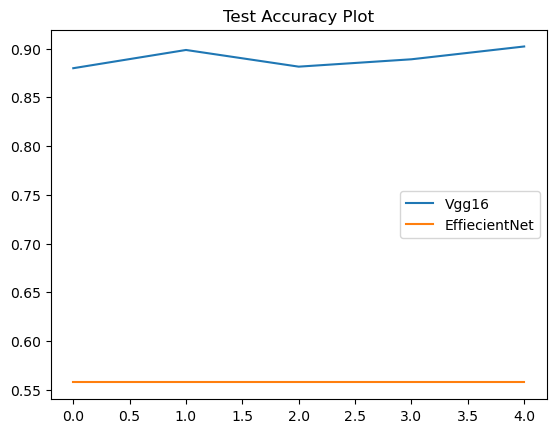

In [165]:
import matplotlib.pyplot as plt
plt.plot(v['val_accuracy'], label='Vgg16')
plt.plot(e['val_accuracy'], label='EffiecientNet')
plt.title('Test Accuracy Plot')
plt.legend()

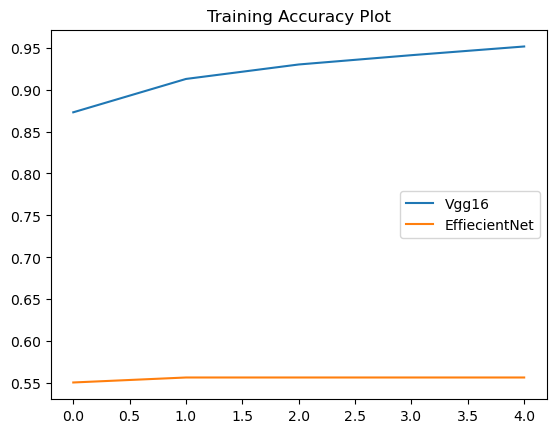

In [166]:
plt.plot(v['accuracy'], label='Vgg16')
plt.plot(e['accuracy'], label='EffiecientNet')
plt.title('Training Accuracy Plot')
plt.legend()